In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

from cv_utils import get_grid_mask, verify_grid, find_corners_from_contour, crop_and_warp

In [12]:
path = '../data/train/image1078.jpg'
image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

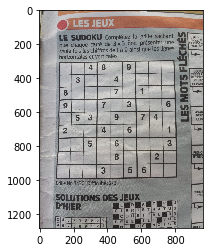

In [13]:
plt.imshow(image)

In [14]:
mask, h, v = get_grid_mask(image)

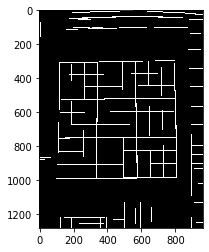

In [15]:
plt.imshow(mask, cmap='gray')

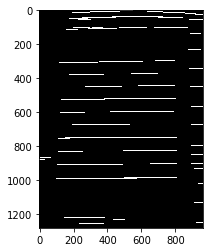

In [16]:
plt.imshow(h, cmap='gray')

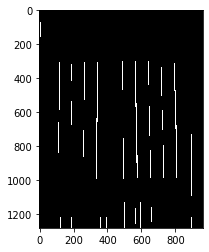

In [17]:
plt.imshow(v, cmap='gray')

In [18]:
# Find intersections between the lines to determine if the intersections are grid joints.
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# if a exists, it has to be the biggest polygon
contours = sorted(contours, key=cv.contourArea, reverse=True)

intersections = cv.bitwise_and(h, v)

In [19]:
new_image = None
for grid_number, contour in enumerate(contours):

    # verify that Region of Interest (ROI) is a table
    rect = verify_grid(contour, intersections)
    if rect is None:
        continue

    corners = find_corners_from_contour(contour)
    new_image = crop_and_warp(image, corners)
    new_image = cv.resize(new_image, (512, 512))
    
    break
    

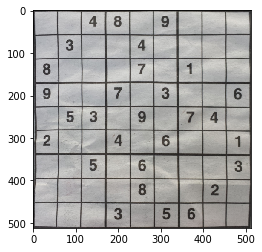

In [20]:
plt.imshow(new_image)

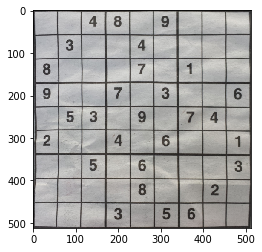

In [21]:
plt.imshow(new_image)